**PART 1 - NEURAL NETWORK FROM SCRATCH**

In [0]:
# Command to unzip data folder for running in Google Colab

!unzip data_with_notebook.zip

Archive:  data_with_notebook.zip
   creating: data/
   creating: data/fashion/
  inflating: data/fashion/t10k-images-idx3-ubyte.gz  
  inflating: data/fashion/t10k-labels-idx1-ubyte.gz  
  inflating: data/fashion/train-images-idx3-ubyte.gz  
  inflating: data/fashion/train-labels-idx1-ubyte.gz  
   creating: scripts/
  inflating: scripts/fashion_mnist_reader.ipynb  
  inflating: scripts/util_mnist_reader.py  


In [0]:
# Function to load the data
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
# Splitting into training and testing data
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [0]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [0]:
import numpy as np

m1 = X_train.shape[0] # Training set size
m2 = X_test.shape[0] # Testing set size
labels = 10 # Number of output labels

y_train = y_train.reshape(1,m1) # Reshaping to 1*60000
y_test = y_test.reshape(1,m2) # Reshaping to 1*10000

'''One hot encoding the training labels'''
Y_train_new = np.eye(labels)[y_train.astype('int32')]
Y_train_new = Y_train_new.T.reshape(labels, m1)

'''One hot encoding the training labels'''
Y_test_new = np.eye(labels)[y_test.astype('int32')]
Y_test_new = Y_test_new.T.reshape(labels, m2)

print("Y_train_new shape ", Y_train_new.shape)
print("Y_test_new shape ", Y_test_new.shape)

Y_train_new shape  (10, 60000)
Y_test_new shape  (10, 10000)


In [0]:
import numpy as np

'''Implementation of the sigmoid function'''
def sigmoid(x):
    
    val= (1/(1+np.exp(-1*x)))    
    
    return val

'''Implementation of the softmax function'''
def softmax(x):
  
  val = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

  return val

'''Loss function for multi-class data'''
def compute_multiclass_loss(Y, Y_hat,learning_rate,w1,w2):

    Y = Y.reshape(60000,10)
    m = Y.shape[0]
    
    log_term = (-1)*np.sum(np.multiply(Y, np.log(Y_hat)))
    
    p1 = log_term/m

    w1 = np.square(w1)
    w2 = np.square(w2)
    ts1 = np.sum(w1) + np.sum(w2) 

    L = p1 + (learning_rate/(2*m))*ts1

    return L
'''Training the model'''
def train(X_train, y_train):
  
  input_size = X_train.shape[0]
  flat = X_train.shape[1] # Input dimensions after flattening
  m = X_train.shape[0]
  hidden = 64
  classes = 10

  learning_rate = 0.05
  epochs = 4000

  '''Random initialization of weights and biases'''
  W1 = np.random.rand(flat, hidden) * 0.01
  b1 = np.zeros((hidden))
  W2 = np.random.rand(hidden, classes) * 0.01
  b2 = np.zeros((classes))

  losstrack = [] # To keep track of the losses

  for epoch in range(epochs):

      '''Forward propagation'''
      Z1 = np.dot(X_train, W1) + b1 # Output of hidden layer
      A1 = sigmoid(Z1) # Sigmoid of output of hidden layer
      Z2 = np.dot(A1, W2) + b2 # Final predictions
      A2 = softmax(Z2) # Softmax of final predictions
   
      cost = compute_multiclass_loss(y_train, A2, learning_rate, W1, W2)
      losstrack.append(cost)
    
      '''Back propagation'''
      '''Calculating the derivates''''
      dZ2 = A2 - y_train.T
      dW2 = (1./m) * np.dot(A1.T, dZ2)
      db2 = (1./m) * np.sum(dZ2, axis=0, keepdims=True)
           
      dA1 = np.dot(dZ2, W2.T)
      dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
      dW1 = (1./m) * np.dot(X_train.T, dZ1)
      db1 = (1./m) * np.sum(dZ1, axis=0, keepdims=True)
    
      '''Updating the weights and biases'''
      W2 = W2 - learning_rate * dW2
      b2 = b2 - learning_rate * db2
      W1 = W1 - learning_rate * dW1
      b1 = b1 - learning_rate * db1
      
      if epoch % 100 == 0:
        print("For Epoch", epoch, "cost = ", cost)
     
  return W1, b1, W2, b2, losstrack

In [0]:
W1, b1, W2, b2, losstrack = train(X_train, Y_train_new)

For Epoch 0 cost =  2.3027183854749143
For Epoch 100 cost =  2.302585799751605
For Epoch 200 cost =  2.302585799751605
For Epoch 300 cost =  2.302585799751605
For Epoch 400 cost =  2.302585799751605
For Epoch 500 cost =  2.3025857997516055
For Epoch 600 cost =  2.3025857997516055
For Epoch 700 cost =  2.302585799751605
For Epoch 800 cost =  2.302585799751605
For Epoch 900 cost =  2.302585799751605
For Epoch 1000 cost =  2.3025857997516055
For Epoch 1100 cost =  2.302585799751605
For Epoch 1200 cost =  2.3025857997516055
For Epoch 1300 cost =  2.302585799751605
For Epoch 1400 cost =  2.302585799751605
For Epoch 1500 cost =  2.302585799751605
For Epoch 1600 cost =  2.302585799751605
For Epoch 1700 cost =  2.3025857997516055
For Epoch 1800 cost =  2.302585799751605
For Epoch 1900 cost =  2.302585799751605
For Epoch 2000 cost =  2.302585799751605
For Epoch 2100 cost =  2.3025857997516055
For Epoch 2200 cost =  2.302585799751605
For Epoch 2300 cost =  2.302585799751605
For Epoch 2400 cost =

Text(0, 0.5, 'Training_Loss')

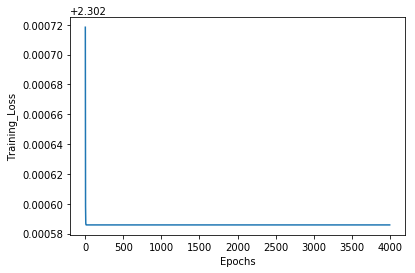

In [0]:
import matplotlib.pyplot as plt

plt.plot(losstrack)
plt.xlabel("Epochs")
plt.ylabel("Training_Loss")

In [0]:
'''Finding the label with max probability prediction'''
def class_predictions(A):

  max_row_val = np.zeros(A.shape[0]) # No of rows of A

  for i in range(len(A)): # For each row

    maximum = np.NINF
    max_indx = -1

    for j in range(len(A[0])): # For each column
      
      if ( A[i][j] > maximum ):
        
        maximum = A[i][j]
        max_indx = j

    np.append(max_row_val, max_indx)

    return max_row_val

def test(X_test, y_test, W1, b1, W2, b2):

  count = 0
  test_size = y_test.shape[0]

  Zt1 = np.dot(X_test, W1) + b1
  At1 = sigmoid(Zt1)

  Zt2 = np.dot(At1, W2) + b2
  At2 = softmax(Zt2)

  predictions = class_predictions(At2) # Converting our matrix of predictions into single valued predictions for each sample

  for i in range(test_size):

    if (predictions[i] == y_test[i]):
      count = count + 1
  
  accuracy = count/test_size

  return accuracy

In [0]:
accuracy = test(X_test, y_test_copy, W1, b1, W2, b2)

In [0]:
print("Testing accuracy is ", accuracy)

Testing accuracy is  72.58


**PART 2 - MULTI-LAYER NEURAL NETWORK USING KERAS**

In [0]:
!unzip data_with_notebook.zip

Archive:  data_with_notebook.zip
   creating: data/
   creating: data/fashion/
  inflating: data/fashion/t10k-images-idx3-ubyte.gz  
  inflating: data/fashion/t10k-labels-idx1-ubyte.gz  
  inflating: data/fashion/train-images-idx3-ubyte.gz  
  inflating: data/fashion/train-labels-idx1-ubyte.gz  
   creating: scripts/
  inflating: scripts/fashion_mnist_reader.ipynb  
  inflating: scripts/util_mnist_reader.py  


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 2.9050 - acc: 0.7516 - val_loss: 1.0678 - val_acc: 0.7636
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6942 - acc: 0.8051 - val_lo

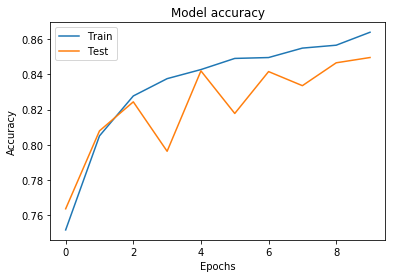

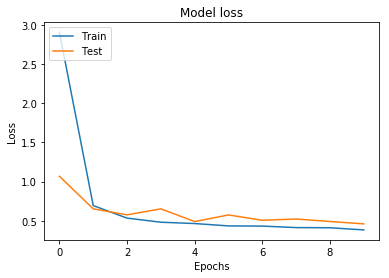

Confusion matrix is
 [[864   4  16  36   3   1  61   0  15   0]
 [  5 938   1  43   5   0   6   0   2   0]
 [ 32   0 739   9 175   0  41   0   4   0]
 [ 53  11  11 866  29   0  24   0   6   0]
 [  0   0  91  49 826   0  30   0   4   0]
 [  1   0   1   0   0 939   0  39   4  16]
 [194   0 119  26 155   0 484   0  22   0]
 [  0   0   0   0   0  28   0 948   2  22]
 [  8   0   1   1   5   4   7   3 971   0]
 [  0   0   0   0   0  21   1  57   0 921]]


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from keras.callbacks import TensorBoard
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = models.Sequential()
fc = layers.Dense(128, activation='relu', input_dim=784)
fc2 = layers.Dense(128 ,activation='relu')
output = layers.Dense(10, 'softmax')
model.add(fc)
model.add(fc2)
model.add(output)
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,
         batch_size=100,
         validation_data=(X_test,y_test)
         )
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTesting accuracy is : ", test_accuracy * 100)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predicting the Test set results
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
print("Confusion matrix is\n", cm)

**CONVOLUTIONAL NEURAL NETWORK**

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/8





60000/60000 [==============================] - 20s 341us/step - loss: 0.3900 - acc: 0.8607 - val_loss: 0.3066 - val_acc: 0.8886
Epoch 2/8
60000/60000 [==============================] - 19s 312us/step - loss: 0.2652 - acc: 0.9055 - val_loss: 0.3050 - val_acc: 0.8895
Epoch 3/8
60000/60000 [==============================] - 19s 312us/step - loss: 0.2151 - acc: 0.9215 - val_loss: 0.2928 - val_acc: 0.8944
Epoch 4/8
60000/60000 [==============================] - 19s 311us/step - loss: 0.1771 - acc: 0.9359 - val_loss: 0.2579 - val_acc: 0.9110
Epoch 5/8
60000/60000 [==============================] - 19s 312us/step - loss: 0.1440 - acc: 0.9477 - val_loss: 0.2549 - val_acc: 0.9145
Epoch 6/8
60000/60000 [==============================] - 19s 313us/step - loss: 0.1172 - acc: 0.9577 - val_loss: 0.2899 - val_acc: 0.9056
Epoch 7/8
60000

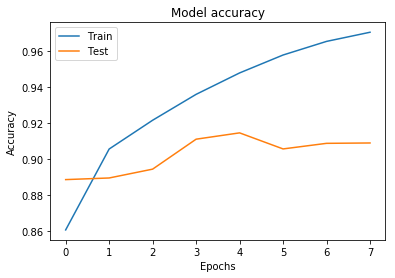

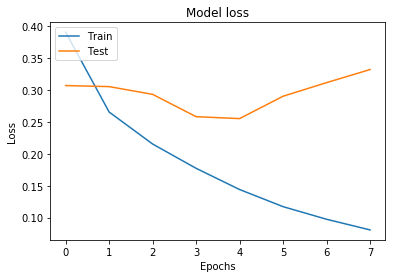

Confusion matrix is
 [[884   2  19  17   1   1  73   0   3   0]
 [  2 979   2  10   2   0   2   0   3   0]
 [ 17   1 859   9  53   0  60   0   1   0]
 [ 25   5  19 906  28   0  16   0   1   0]
 [  2   1  46  30 857   0  62   0   2   0]
 [  0   0   0   1   0 981   0  15   0   3]
 [150   0  49  28  60   0 704   0   9   0]
 [  0   0   0   0   0   5   0 979   0  16]
 [  3   1   5   4   3   1   5   2 975   1]
 [  1   0   0   0   0   7   0  27   0 965]]


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import TensorBoard
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTesting accuracy is : ", test_accuracy * 100)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predicting the Test set results
y_pred = model.predict(X_test)
rounded_labels=np.argmax(y_test, axis=1)
cm = confusion_matrix(rounded_labels, y_pred.argmax(axis=1))
print("Confusion matrix is\n", cm)